In [1]:
# SETUP

import contextlib
import pathlib
import shutil

from pyiron_workflow.api import util

json_files = util.copy_stored_workflows(".")

lpg = util.LocalPostgres()
lpg.stop()
lpg.remove()
lpg.init()
lpg.start()

Skipped ('pg_ctl', '-D', '/Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata', 'stop')
Skipped ('pg_ctl', '-D', '/Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata', 'status')
Skipped ('pg_ctl', '-D', '/Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata', 'stop')
Running ('initdb', '-D', '/Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata')
The files belonging to this database system will be owned by user "liamhuber".
This user must also own the server process.

The database cluster will be initialized with this locale configuration:
  locale provider:   libc
  LC_COLLATE:  C
  LC_CTYPE:    UTF-8
  LC_MESSAGES: C
  LC_MONETARY: C
  LC_NUMERIC:  C
  LC_TIME:     C
The default database encoding has accordingly been set to "UTF8".
The default text search configuration will be set to "simple".

Data page checksums are disabled.

fixing permissions on existing directory /Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata ... ok
creating subdirectories ... ok
selecting dynamic shared

initdb: could not find suitable text search configuration for locale "UTF-8"


ok
syncing data to disk ... ok


Success. You can now start the database server using:

    pg_ctl -D /Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata -l logfile start

Running ('pg_ctl', '-D', '/Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata', '-o', '-p 5432', '-l', '/Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata/logfile', 'start')
waiting for server to start.... done
server started


initdb: warning: enabling "trust" authentication for local connections
initdb: hint: You can change this by editing pg_hba.conf or using the option -A, or --auth-local and --auth-host, the next time you run initdb.


Running ('createuser', '-p', '5432', '-s', 'localuser')
Running ('createdb', '-p', '5432', '-O', 'localuser', 'localdb')
Running ('pg_ctl', '-D', '/Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata', 'stop')
waiting for server to shut down.... done
server stopped
Running ('pg_ctl', '-D', '/Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata', '-o', '-p 5432', '-l', '/Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata/logfile', 'start')
waiting for server to start.... done
server started


In [ ]:
%config IPCompleter.evaluation='unsafe'

import concurrent.futures
import copy
import importlib
import json
import math
import pickle
from typing import Optional


import black
import executorlib
import numpy as np
import pandas as pd
import sqlalchemy 
import pyiron_database.instance_database as idb
from sqlalchemy import orm


import pyiron_nodes
from pyiron_workflow.api import graph as base, simple_workflow as pwf, gui

In [ ]:
pf = gui.PyironFlow(['murnaghan2', 'energy', 'murn4', 'db']) # 'landau2',
pf.gui

In [4]:
# MUST ENSURE `'murn4'` graph is the active one -- how to do this with code?
# We could go back and manually change the order they are loaded in,
# but I want to see what is required to actually select one
def select_graph_by_name(pf: gui.PyironFlow, graph_label: str):
    pf.tab_widget.selected_index = [w.graph.label for w in pf.wf_widgets].index(graph_label)

select_graph_by_name(pf, "murn4")

graph = pf.graph
graph = base.update_execution_graph(graph, debug=True)
nodeB = graph.nodes["BulkStaticEnergyF"].node
nodeI = graph.nodes["IterNode"].node

idb.get_hash(nodeB), id(nodeB), id(nodeI.inputs.node.value.node)  

Updating input BulkStaticEnergyF in node BulkStaticEnergyF out node 6090848880 6090848880
Updating input Linspace in node Linspace linspace kwarg_list 6090845424 6090845424
Updating input CreateDB in node CreateDB db _db 6090835296 6090835296
Updating input CreateDB in node CreateDB db _db 6090835296 6090835296
Updating input CreateDB in node CreateDB db db 6090835296 6090835296


('53ac213be901c9c01914b0184ad75b68bed31310fdbf559557cc1a9fce9e025d',
 6090848880,
 6090848880)

In [5]:
id(nodeB.outputs.out.node), id(nodeB)

(6090848880, 6090848880)

In [6]:
nodeI.outputs.data.keys()

dict_keys(['label', 'type', 'ready', 'value', 'node'])

In [7]:
nodeB.inputs

,label,type,default,ready,value,node
0,name,str,NotData,True,Al,<pyiron_workflow.simple_workflow.Node object a...
1,a,float,None,True,None,<pyiron_workflow.simple_workflow.Node object a...
2,store,bool,True,True,True,<pyiron_workflow.simple_workflow.Node object a...
3,_db,NotHinted,None,True,label ...,<pyiron_workflow.simple_workflow.Node object a...


In [8]:
nodeI.inputs.node.value

label                                                  out
type                                     builtins.NoneType
ready                                                False
value                                                 None
node     <pyiron_workflow.simple_workflow.Node object a...
dtype: object

In [9]:
idb.get_hash(nodeI.inputs.node.value.node)

'53ac213be901c9c01914b0184ad75b68bed31310fdbf559557cc1a9fce9e025d'

In [10]:
 nodeI.inputs.node.value.node.inputs

,label,type,default,ready,value,node
0,name,str,NotData,True,Al,<pyiron_workflow.simple_workflow.Node object a...
1,a,float,None,True,None,<pyiron_workflow.simple_workflow.Node object a...
2,store,bool,True,True,True,<pyiron_workflow.simple_workflow.Node object a...
3,_db,NotHinted,None,True,label ...,<pyiron_workflow.simple_workflow.Node object a...


In [11]:
base._find_input_nodes(base._remove_node_inputs(graph), 1)

[2, 3, 1]

In [12]:
pyiron_nodes.local_workflows.test.BulkStaticEnergy

<function pyiron_nodes.local_workflows.test.BulkStaticEnergy(name: str, a: float = None, store: bool = True, _db=None) -> float>

In [13]:
@pwf.as_function_node("energy")
def BulkStaticEnergy(name: str, a: float = None):

    from pyiron_workflow import Workflow
    import pyiron_nodes

    wf = Workflow('subgraph')

    wf.Bulk = pyiron_nodes.atomistic.structure.build.Bulk(name=name, a=a) 
    wf.M3GNet = pyiron_nodes.atomistic.engine.ase.M3GNet() 
    wf.Static = pyiron_nodes.atomistic.calculator.ase.Static(structure=wf.Bulk, engine=wf.M3GNet) 
    wf.GetEnergyLast = pyiron_nodes.atomistic.calculator.output.GetEnergyLast(calculator=wf.Static) 

    out = wf.GetEnergyLast.pull()

    return out

    # return wf.GetEnergyLast.outputs.energy_last

In [15]:
@pwf.as_macro_node(["BulkStaticEnergy", "BulkStructure"])
def BulkStaticEnergy(name: str, a: float = None):

    from pyiron_workflow import Workflow
    import pyiron_nodes

    wf = Workflow('subgraph')

    wf.Bulk = pyiron_nodes.atomistic.structure.build.Bulk(name=name, a=a) 
    wf.M3GNet = pyiron_nodes.atomistic.engine.ase.M3GNet() 
    wf.Static = pyiron_nodes.atomistic.calculator.ase.Static(structure=wf.Bulk, engine=wf.M3GNet) 
    wf.GetEnergyLast = pyiron_nodes.atomistic.calculator.output.GetEnergyLast(calculator=wf.Static) 

    return wf.GetEnergyLast.outputs.energy_last, wf.Bulk

In [16]:
args = ["BulkStaticEnergy", "BulkStructure"]
# print("args", args, isinstance(args[0], str))
if isinstance(args[0], str):
    output_labels = list(args)
else:
    output_labels = None
output_labels

['BulkStaticEnergy', 'BulkStructure']

In [17]:
out = BulkStaticEnergy(name='Al').run()
out
#isinstance(out, Port)
#out.node._workflow.run()
# out._workflow.run()
# _return_as_macro_node(BulkStaticEnergy('Al'), 'Bulk', 'Energy', 'macro')

/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/matgl/apps/pes.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.element_refs = AtomRef(property_offset=torch.tensor(element_refs, dtype=matgl.float_th))
/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/matgl/apps/pes.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("data_mean", torch.tensor(data_mean, dtype=matgl.float_th))
/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/matgl/apps/pes.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

(-3.701530933380127,
 Al: [0. 0. 0.]
 tags: 
     indices: [0]
 pbc: [ True  True  True]
 cell: 
 Cell([[0.0, 2.025, 2.025], [2.025, 0.0, 2.025], [2.025, 2.025, 0.0]]))

In [18]:
select_graph_by_name(pf, "murnaghan2")
pf.graph.nodes["subgraph"].node.node_type

'graph'

In [19]:
base.get_inputs_of_graph(pf.graph.nodes["subgraph"].graph, exclude_unconnected_default_ports=True)

,label,value,type,default,ready
0,Bulk__name,Al,str,NotData,True
1,Bulk__a,2,float,None,True


In [20]:
print(base.get_code_from_graph(pf.graph.nodes["subgraph"].graph))


def subgraph(Bulk__name: str = "Al", Bulk__a: float = 2):

    from pyiron_workflow import Workflow
    wf = Workflow('subgraph')

    from pyiron_nodes.atomistic.structure.build import Bulk
    wf.Bulk = Bulk(name=Bulk__name, a=Bulk__a)
    from pyiron_nodes.atomistic.engine.ase import M3GNet
    wf.M3GNet = M3GNet()
    from pyiron_nodes.atomistic.calculator.ase import Static
    wf.Static = Static(structure=wf.Bulk, engine=wf.M3GNet)
    from pyiron_nodes.atomistic.calculator.output import GetEnergyLast
    wf.GetEnergyLast = GetEnergyLast(calculator=wf.Static)

    return wf.GetEnergyLast.outputs.energy_last



In [21]:
# db  # NameError: name 'db' is not defined

From here on, we need the database to actually be populated with results from our workflows. Since this is not part of our static data, obtain it by simply re-running each of the existing workflows.

In [22]:
def pull_all_terminal_nodes(graph: base.Graph, _verbose: bool = False):
    graph_copy = base.get_updated_graph(graph)
    for label, graph_node in graph_copy.nodes.items():
        is_virtual = (
            graph_node.node_type != "node" # Is this true? Is a "graph" node_type always virtual?
            and graph_node.node is not None  # These are virtual IO nodes
        )
        is_terminal = label not in graph.edges.df["source"].values
        
        if is_terminal and not is_virtual:
            if _verbose:
                print("Pulling", label)
            base.pull_node(graph_copy, label)

for wfw in pf.wf_widgets:
    if wfw.graph.label == "db":
        # The GetGraph node of this workflow fails for the stored "node_id" of 20
        # It also fails if I go back and set this to 0
        # I don't know what should be in the database at this point, but it isn't
        continue
    print("Ensuring execution for", wfw.graph.label)
    pull_all_terminal_nodes(wfw.graph)

/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/matgl/apps/pes.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.element_refs = AtomRef(property_offset=torch.tensor(element_refs, dtype=matgl.float_th))
/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/matgl/apps/pes.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("data_mean", torch.tensor(data_mean, dtype=matgl.float_th))
/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/matgl/apps/pes.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

Ensuring execution for murnaghan2
Running node Linspace
Running node CreateDB
Running node IterNode
Restoring node outputs  9bd7911eb91f5326720e2753be05f5fde5a2edef5bc7c0d66e12817ffb145501 False
No stored data found for node:  IterNode
copy node (port):  subgraph fb6471b1fc8bd5750d43fac2f3f132e61276aec65b34f665550cafe024c01e2a


DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!
/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/matgl/apps/pes.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.element_refs = AtomRef(property_offset=torch.tensor(element_refs, dtype=matgl.float_th))
/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/matgl/apps/pes.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("data_mean", to

serialization needed
stored:  IterNode .storage/10cbd2c7503397244d3b8ba7eda766aca96cb845aee39ea8904fd6336df60979.hdf5
Running node CreateDB
Running node ShowTable
Ensuring execution for energy
Running node Bulk
Running node M3GNet
Running node CreateDB
Running node Static
Running node GetEnergyLast
serialization not needed
stored:  GetEnergyLast .storage/9288d0ad5c831775093dab6a9f2e1a7100f6ab7d3e6c4220ddbacf4fb809d386.hdf5
Running node CreateDB
Running node ShowTable
Ensuring execution for murn4
Running node Linspace
Running node CreateDB
Running node IterNode
Restoring node outputs  f5acb73836985369d523b5587504f9860c2fe7ce84c027e6f2d2ffb6e655a28d False
No stored data found for node:  IterNode
copy node (port):  BulkStaticEnergyF 53ac213be901c9c01914b0184ad75b68bed31310fdbf559557cc1a9fce9e025d
Restoring node outputs  2ce3c3a3d5a648f7bd704d950f60cc384fe8caa26f9624777782003cd273dffc False
No stored data found for node:  BulkStaticEnergyF
serialization not needed
stored:  BulkStaticEnergy

DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!
/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/dgl/core.py:82: DGLWarning: The input graph for the user-defined edge function does not contain valid edges
  dgl_warning(
DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!


serialization not needed
stored:  BulkStaticEnergyF .storage/b60f6d99ddffb5207c332b1e74690acb40681935b1895136516bbe8e78f16213.hdf5
Restoring node outputs  739d468e8a6545995369fb7c9c9e13d2fd367c0a3505b3fb40dd3f583db369b6 False
No stored data found for node:  BulkStaticEnergyF
serialization not needed
stored:  BulkStaticEnergyF .storage/739d468e8a6545995369fb7c9c9e13d2fd367c0a3505b3fb40dd3f583db369b6.hdf5
Restoring node outputs  5b7e6a6570012f882b7b6af8c682d4e820c0bcd1738c6d231680492495c60ed9 False
No stored data found for node:  BulkStaticEnergyF
serialization not needed
stored:  BulkStaticEnergyF .storage/5b7e6a6570012f882b7b6af8c682d4e820c0bcd1738c6d231680492495c60ed9.hdf5
Restoring node outputs  44b1dc2862608dd3150b77d8efcbba02be1ec99a6f328d7d02928ccd6873ba02 False
No stored data found for node:  BulkStaticEnergyF
serialization not needed
stored:  BulkStaticEnergyF .storage/44b1dc2862608dd3150b77d8efcbba02be1ec99a6f328d7d02928ccd6873ba02.hdf5
serialization needed
stored:  IterNode .s

In [23]:
select_graph_by_name(pf, "murn4")
pf.graph.nodes["ShowTable"].node.outputs.df.value.iloc[7].hash

'9288d0ad5c831775093dab6a9f2e1a7100f6ab7d3e6c4220ddbacf4fb809d386'

In [24]:


user = 'localuser'
password = 'none'
host = 'localhost'
port = '5432'
database = 'localdb'

connection_str = f'postgresql://{user}:{password}@{host}:{port}/{database}'
db = idb.PostgreSQLInstanceDatabase(connection_str)
# db.drop()  # But if we do this, we lose all our data?!
# db.init()



In [25]:
Session = orm.sessionmaker(bind=db.engine)
session = Session()

df = pd.read_sql(session.query(db.table).statement, session.bind)

session.close()

_, graph = idb.restore_node_from_database(db=db, node_hash=df.hash.iloc[6]) #[19])
#_, graph = restore_node_from_database(db=db, node_hash='cf0bda97885d0ddf6b8a4cd1a92d38806147e0721a9f646cfb3a37487dd6a7b2')
gui.GuiGraph(graph)

ReactFlowWidget(layout=Layout(height='600px', width='800px'))

In [26]:
df

,hash,qualname,module,version,connected_inputs,inputs,outputs,output_path,master_hash,start_time,cpu_time,executor,user
0,39669a289cc8b85c2e0774812b662253c661d306ef02d9...,subgraph,pyiron_workflow.graph.base,not_defined,[],"{'Bulk__a': 2.2, 'Bulk__name': 'Al'}",[GetEnergyLast__energy_last],None,fb6471b1fc8bd5750d43fac2f3f132e61276aec65b34f6...,2025-06-04 21:43:59.827932,0.045893,None,liamhuber
1,11e5f779d5a00821a3a28813c8cdb0c83a38c1fedce8e6...,Linspace,pyiron_nodes.math,not_defined,[],"{'x_max': 2.2, 'x_min': 1.8, 'endpoint': True,...",[linspace],None,None,2025-06-04 21:43:59.271852,0.000176,None,liamhuber
2,64667395d1b66a8a0ef131b4bade730b217b32465b813b...,CreateDB,pyiron_nodes.databases.node_hash_db,not_defined,[],"{'host': 'localhost', 'port': 5432, 'user': 'l...",[db],None,None,2025-06-04 21:43:59.272083,0.089827,None,liamhuber
3,10cbd2c7503397244d3b8ba7eda766aca96cb845aee39e...,IterNode,pyiron_nodes.executors,not_defined,"[node, kwarg_list, _db]",{'_db': '64667395d1b66a8a0ef131b4bade730b217b3...,[df],None,None,2025-06-04 21:43:59.398809,0.475150,None,liamhuber
4,7b4123d2f2ee2e9877493b62f6becb05f0483761d43031...,Bulk,pyiron_nodes.atomistic.structure.build,not_defined,[],"{'a': None, 'c': None, 'u': None, 'name': 'Al'...",[structure],None,None,2025-06-04 21:43:59.888647,0.000186,None,liamhuber
5,635cc10c63f0d96564a0eeb790d4adf102485cc41e475f...,M3GNet,pyiron_nodes.atomistic.engine.ase,not_defined,[],{'model': 'M3GNet-MP-2021.2.8-PES'},[out],None,None,2025-06-04 21:43:59.888844,0.015045,None,liamhuber
6,29624f6695f9b692420ba8f88e6a7965fff1347d9148b9...,Static,pyiron_nodes.atomistic.calculator.ase,not_defined,"[structure, engine]",{'engine': '635cc10c63f0d96564a0eeb790d4adf102...,[out],None,None,2025-06-04 21:43:59.908840,0.009033,None,liamhuber
7,9288d0ad5c831775093dab6a9f2e1a7100f6ab7d3e6c42...,GetEnergyLast,pyiron_nodes.atomistic.calculator.output,not_defined,"[calculator, _db]",{'_db': '64667395d1b66a8a0ef131b4bade730b217b3...,[energy_last],None,None,2025-06-04 21:43:59.917899,0.003457,None,liamhuber
8,2ce3c3a3d5a648f7bd704d950f60cc384fe8caa26f9624...,BulkStaticEnergyF,pyiron_nodes.local_workflows.test,not_defined,[_db],"{'a': 3.0, '_db': '64667395d1b66a8a0ef131b4bad...",[out],None,53ac213be901c9c01914b0184ad75b68bed31310fdbf55...,2025-06-04 21:43:59.948640,0.032617,None,liamhuber
9,276310e6b46125c446f61274ed951cd586592522fd3d9b...,BulkStaticEnergyF,pyiron_nodes.local_workflows.test,not_defined,[_db],"{'a': 3.6666666666666665, '_db': '64667395d1b6...",[out],None,53ac213be901c9c01914b0184ad75b68bed31310fdbf55...,2025-06-04 21:43:59.990259,0.027236,None,liamhuber


In [27]:
# df.query("hash == '9c051a26834ef83bbbe6c11c9fc0fc8c24cc06229432d31021fd00faa4c738ef'").iloc[0]
# Couldn't find that hash
some_valid_hash = df["hash"].iloc[0]
df.query(f"hash == '{some_valid_hash}'").iloc[0]

hash                39669a289cc8b85c2e0774812b662253c661d306ef02d9...
qualname                                                     subgraph
module                                     pyiron_workflow.graph.base
version                                                   not_defined
connected_inputs                                                   []
inputs                           {'Bulk__a': 2.2, 'Bulk__name': 'Al'}
outputs                                  [GetEnergyLast__energy_last]
output_path                                                      None
master_hash         fb6471b1fc8bd5750d43fac2f3f132e61276aec65b34f6...
start_time                                 2025-06-04 21:43:59.827932
cpu_time                                                     0.045893
executor                                                         None
user                                                        liamhuber
Name: 0, dtype: object

In [28]:
# df[df.hash==inputs["node"].split("@")[0]].iloc[0]
# NameError: name 'inputs' is not defined

In [29]:
# button
# NameError: name 'button' is not defined

In [30]:
pyiron_nodes.atomistic.structure.build.Bulk('Al')._func.__qualname__

'Bulk'

In [31]:
select_graph_by_name(pf, "murn4")
df = pf.graph.nodes["IterNode"].node.outputs.df.value
state = df.__getstate__()
print(state)

df_new = pd.DataFrame() # .__setstate__(state)
df_new._mgr = state["_mgr"]
df_new._metadata = state["_metadata"]
df_new2 = pd.DataFrame()
df_new2.__setstate__(state)
df_new2

{'_mgr': BlockManager
Items: Index(['a', 'result'], dtype='object')
Axis 1: RangeIndex(start=0, stop=7, step=1)
NumpyBlock: slice(0, 2, 1), 2 x 7, dtype: float64, '_typ': 'dataframe', '_metadata': [], 'attrs': {}, '_flags': {'allows_duplicate_labels': True}}


,a,result
0,3.000000,2.528607
1,3.666667,-3.223616
2,4.333333,-3.567102
3,5.000000,-2.563248
4,5.666667,-0.607272
5,6.333333,0.184764
6,7.000000,-0.148894


In [32]:
node = pf.graph.nodes["IterNode"].node

In [33]:
user = 'localuser'
password = 'none'
host = 'localhost'
port = '5432'
database = 'localdb'

connection_str = f'postgresql://{user}:{password}@{host}:{port}/{database}'
engine = sqlalchemy.create_engine(connection_str)
engine.connect()

inspector = sqlalchemy.inspect(engine)
table_names = inspector.get_table_names()
table_names

['nodes']

In [34]:
node = pf.graph.nodes["IterNode"].node

db = idb.PostgreSQLInstanceDatabase(connection_str)
# db.drop()
# db.init()
# hash = idb.store_node_in_database(db, node, store_outputs=True, store_input_nodes_recursively=True)
# Gets a pickle complaint -- just skipping running it:
# File ~/dev/pycor/pyiron_core/pyiron_database/obj_reconstruction/util.py:114, in pickle_dump(obj)
#     113 def pickle_dump(obj):
# --> 114     return codecs.encode(pickle.dumps(obj), "base64").decode()
# AttributeError: Can't get local object 'create_engine.<locals>.connect'

# idb.store_node_outputs(pf.graph.nodes["IterNode"].node)

In [35]:
type(db)

pyiron_database.instance_database.PostgreSQLInstanceDatabase.PostgreSQLInstanceDatabase

In [36]:
Session = orm.sessionmaker(bind=db.engine)
session = Session()

df = pd.read_sql(session.query(db.table).statement, session.bind)

df

,hash,qualname,module,version,connected_inputs,inputs,outputs,output_path,master_hash,start_time,cpu_time,executor,user
0,39669a289cc8b85c2e0774812b662253c661d306ef02d9...,subgraph,pyiron_workflow.graph.base,not_defined,[],"{'Bulk__a': 2.2, 'Bulk__name': 'Al'}",[GetEnergyLast__energy_last],None,fb6471b1fc8bd5750d43fac2f3f132e61276aec65b34f6...,2025-06-04 21:43:59.827932,0.045893,None,liamhuber
1,11e5f779d5a00821a3a28813c8cdb0c83a38c1fedce8e6...,Linspace,pyiron_nodes.math,not_defined,[],"{'x_max': 2.2, 'x_min': 1.8, 'endpoint': True,...",[linspace],None,None,2025-06-04 21:43:59.271852,0.000176,None,liamhuber
2,64667395d1b66a8a0ef131b4bade730b217b32465b813b...,CreateDB,pyiron_nodes.databases.node_hash_db,not_defined,[],"{'host': 'localhost', 'port': 5432, 'user': 'l...",[db],None,None,2025-06-04 21:43:59.272083,0.089827,None,liamhuber
3,10cbd2c7503397244d3b8ba7eda766aca96cb845aee39e...,IterNode,pyiron_nodes.executors,not_defined,"[node, kwarg_list, _db]",{'_db': '64667395d1b66a8a0ef131b4bade730b217b3...,[df],None,None,2025-06-04 21:43:59.398809,0.475150,None,liamhuber
4,7b4123d2f2ee2e9877493b62f6becb05f0483761d43031...,Bulk,pyiron_nodes.atomistic.structure.build,not_defined,[],"{'a': None, 'c': None, 'u': None, 'name': 'Al'...",[structure],None,None,2025-06-04 21:43:59.888647,0.000186,None,liamhuber
5,635cc10c63f0d96564a0eeb790d4adf102485cc41e475f...,M3GNet,pyiron_nodes.atomistic.engine.ase,not_defined,[],{'model': 'M3GNet-MP-2021.2.8-PES'},[out],None,None,2025-06-04 21:43:59.888844,0.015045,None,liamhuber
6,29624f6695f9b692420ba8f88e6a7965fff1347d9148b9...,Static,pyiron_nodes.atomistic.calculator.ase,not_defined,"[structure, engine]",{'engine': '635cc10c63f0d96564a0eeb790d4adf102...,[out],None,None,2025-06-04 21:43:59.908840,0.009033,None,liamhuber
7,9288d0ad5c831775093dab6a9f2e1a7100f6ab7d3e6c42...,GetEnergyLast,pyiron_nodes.atomistic.calculator.output,not_defined,"[calculator, _db]",{'_db': '64667395d1b66a8a0ef131b4bade730b217b3...,[energy_last],None,None,2025-06-04 21:43:59.917899,0.003457,None,liamhuber
8,2ce3c3a3d5a648f7bd704d950f60cc384fe8caa26f9624...,BulkStaticEnergyF,pyiron_nodes.local_workflows.test,not_defined,[_db],"{'a': 3.0, '_db': '64667395d1b66a8a0ef131b4bad...",[out],None,53ac213be901c9c01914b0184ad75b68bed31310fdbf55...,2025-06-04 21:43:59.948640,0.032617,None,liamhuber
9,276310e6b46125c446f61274ed951cd586592522fd3d9b...,BulkStaticEnergyF,pyiron_nodes.local_workflows.test,not_defined,[_db],"{'a': 3.6666666666666665, '_db': '64667395d1b6...",[out],None,53ac213be901c9c01914b0184ad75b68bed31310fdbf55...,2025-06-04 21:43:59.990259,0.027236,None,liamhuber


In [37]:
# db.drop()
# db.init()

In [38]:
pf = gui.PyironFlow(['assyst', 'linearfit2', 'graph', 'executor', 'executor2', 'murnaghan', 'murnaghan2']) # 'landau2',
pf.gui

In [39]:
# pf = gui.PyironFlow(['assyst', 'calphy2', 'linearfit2', 'graph', 'executor', 'executor2', 'murnaghan', 'murnaghan2']) # 'landau2',
# pf.gui

# https://github.com/JNmpi/pyiron_core/issues/52
# The calphy2 graph will not load:
# File ~/dev/pycor/pyiron_core/pyiron_workflow/graph/base.py:58, in _setstate__graph_node(self, state)
#      57 def _setstate__graph_node(self, state):
# ---> 58     for k, v in state.items():
#      59         if k == "node":
#      60             # print("setting node: ", k, v)
#      61             # check if virtual node (import not possible) # TODO: make more robust test
#      62             if v["function"].startswith("pyiron_workflow.graph.base"):
#      63                 # graph = Graph().__setstate__(state["graph"])

# AttributeError: 'NoneType' object has no attribute 'items'

In [40]:
select_graph_by_name(pf, "murnaghan2")
# could also be "executor2" -- both have "subgraph" and "Linspace" nodes
# ("calphy2" didn't load, but I can peek at the json file to rule it out, as it has neither)
label ="subgraph"
label = "Linspace"
pf.graph.nodes[label].node.copy()._graph_node == pf.graph.nodes[label]

True

In [41]:
new_node = pickle.loads(pickle.dumps(pf.graph.nodes["subgraph"]))
new_node.node

In [42]:
base.GraphNode().__setstate__(pf.graph.nodes["subgraph"].__getstate__()).node.run()

/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/matgl/apps/pes.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.element_refs = AtomRef(property_offset=torch.tensor(element_refs, dtype=matgl.float_th))
/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/matgl/apps/pes.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("data_mean", torch.tensor(data_mean, dtype=matgl.float_th))
/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/matgl/apps/pes.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

53.408348083496094

In [43]:
wf = pwf.Workflow("test")
wf.bulk = pyiron_nodes.atomistic.structure.build.Bulk("Al", cubic=True)
wf.volume = pyiron_nodes.atomistic.structure.calc.Volume(wf.bulk)
# wf.subgraph = Group([wf.bulk, wf.volume])

wf.range = pyiron_nodes.math.Linspace(1.8, 2.2, 7)
# wf.executor = pyiron_nodes.executor.
# wf.iter = pyiron_nodes.executors.IterNode(node=wf.volume, kwarg_name="Bulk__name", kwarg_list=wf.range)

graph = base.get_graph_from_wf(wf, [], [])
graph_sub = base.create_group(graph, [0, 2])

base.get_updated_graph(graph_sub)
#graph_sub

labels ['bulk__name', 'bulk__cubic']
inp:  bulk name
GraphEdge(source='va_i_subgraph__bulk__name', target='bulk', sourceHandle='x', targetHandle='name')
inp:  bulk cubic
GraphEdge(source='va_i_subgraph__bulk__cubic', target='bulk', sourceHandle='x', targetHandle='cubic')
labels ['volume__volume']
node:  bulk GraphNode(id='bulk', import_path='pyiron_nodes.atomistic.structure.build.Bulk', label='bulk', parent_id='subgraph', level=1, node=<pyiron_workflow.simple_workflow.Node object at 0x33079ecf0>, graph=None, node_type='node', widget_type='customNode', expanded=False)
node:  range GraphNode(id='range', import_path='pyiron_nodes.math.Linspace', label='range', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x33101a450>, graph=None, node_type='node', widget_type='customNode', expanded=False)
node:  volume GraphNode(id='volume', import_path='pyiron_nodes.atomistic.structure.calc.Volume', label='volume', parent_id='subgraph', level=1, node=<pyiron_workflow.simp

Graph(id=None, label='test', root_node=None, nodes=Nodes({'subgraph': GraphNode(id='subgraph', import_path=None, label='subgraph', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x3310183e0>, graph=Graph(id=None, label='subgraph', root_node=None, nodes=NestedDict({'bulk': GraphNode(id='bulk', import_path='pyiron_nodes.atomistic.structure.build.Bulk', label='bulk', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x33079ecf0>, graph=None, node_type='node', widget_type='customNode', expanded=False), 'volume': GraphNode(id='volume', import_path='pyiron_nodes.atomistic.structure.calc.Volume', label='volume', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x3307e1d30>, graph=None, node_type='node', widget_type='customNode', expanded=False)}), edges=[GraphEdge(source='bulk', target='volume', sourceHandle='structure', targetHandle='structure')], graph={}), node_type='graph', widget_type='customNode', ex

In [44]:
# graph.nodes["test"] = base.GraphNode()

In [45]:
wf_file = "murnaghan2.json"
with open(wf_file, "r") as f:
    graph_dict = (json.load(f))

# base.Nodes().__setstate__(graph_dict["nodes"])
sub_nodes= graph_dict["nodes"]["subgraph"]["graph"]["nodes"]
#base.Nodes().__setstate__(sub_nodes)
sub_nodes

{'Bulk': {'id': 'Bulk',
  'import_path': 'pyiron_nodes.atomistic.structure.build.Bulk',
  'label': 'Bulk',
  'parent_id': None,
  'level': 0,
  'graph': None,
  'node_type': 'node',
  'widget_type': 'customNode',
  'expanded': False,
  'node': {'label': 'Bulk',
   'function': 'pyiron_nodes.atomistic.structure.build.Bulk',
   'inputs': {'name': 'Al', 'a': 2}}},
 'M3GNet': {'id': 'M3GNet',
  'import_path': 'pyiron_nodes.atomistic.engine.ase.M3GNet',
  'label': 'M3GNet',
  'parent_id': None,
  'level': 0,
  'graph': None,
  'node_type': 'node',
  'widget_type': 'customNode',
  'expanded': False,
  'node': {'label': 'M3GNet',
   'function': 'pyiron_nodes.atomistic.engine.ase.M3GNet',
   'inputs': {}}},
 'Static': {'id': 'Static',
  'import_path': 'pyiron_nodes.atomistic.calculator.ase.Static',
  'label': 'Static',
  'parent_id': None,
  'level': 0,
  'graph': None,
  'node_type': 'node',
  'widget_type': 'customNode',
  'expanded': False,
  'node': {'label': 'Static',
   'function': 'pyiro

In [46]:
wf_file = "murnaghan2.json"
with open(wf_file, "r") as f:
    graph_dict = (json.load(f))


    
 
# loaded_graph = base.Graph().__setstate__(graph_dict["nodes"]["subgraph"]["graph"])
loaded_graph = base.Graph().__setstate__(graph_dict)
#print(get_code_from_graph(loaded_graph.nodes["subgraph"].graph))


# print(get_code_from_graph(loaded_graph.nodes["subgraph"]))
#loaded_graph.nodes["subgraph"].node

#base.graph_to_node(base.Graph().__setstate__(graph_dict["nodes"]["subgraph"]["graph"]))
subgraph = base.Graph().__setstate__(graph_dict["nodes"]["subgraph"]["graph"])

#get_code_from_graph(subgraph)
subgraph.nodes._obj_type is None
#subgraph

False

In [47]:
graph_dict["nodes"]["subgraph"]["graph"]["nodes"]

{'Bulk': {'id': 'Bulk',
  'import_path': 'pyiron_nodes.atomistic.structure.build.Bulk',
  'label': 'Bulk',
  'parent_id': None,
  'level': 0,
  'graph': None,
  'node_type': 'node',
  'widget_type': 'customNode',
  'expanded': False,
  'node': {'label': 'Bulk',
   'function': 'pyiron_nodes.atomistic.structure.build.Bulk',
   'inputs': {'name': 'Al', 'a': 2}}},
 'M3GNet': {'id': 'M3GNet',
  'import_path': 'pyiron_nodes.atomistic.engine.ase.M3GNet',
  'label': 'M3GNet',
  'parent_id': None,
  'level': 0,
  'graph': None,
  'node_type': 'node',
  'widget_type': 'customNode',
  'expanded': False,
  'node': {'label': 'M3GNet',
   'function': 'pyiron_nodes.atomistic.engine.ase.M3GNet',
   'inputs': {}}},
 'Static': {'id': 'Static',
  'import_path': 'pyiron_nodes.atomistic.calculator.ase.Static',
  'label': 'Static',
  'parent_id': None,
  'level': 0,
  'graph': None,
  'node_type': 'node',
  'widget_type': 'customNode',
  'expanded': False,
  'node': {'label': 'Static',
   'function': 'pyiro

In [48]:
loaded_graph.nodes._obj_type

pyiron_workflow.graph.base.GraphNode

The decorator functions of Nodes are a constant source of errors. Can we make them more elegant and robust by going from decorator arguments to class inheritance?? Do I really need something like ob_type? I know the type I want to get from the name, i.e., nodes should have always GraphNode elements.

In [49]:
subgraph = base._load_graph("murnaghan2").nodes["subgraph"]
print('xxx: ', base.graph_to_code(subgraph.graph))

gui.GuiGraph(subgraph.graph)

xxx:  
def subgraph(name: str, a: int = None):

    from pyiron_workflow import Workflow
    wf = Workflow('subgraph')

    from pyiron_nodes.atomistic.structure.build import Bulk
    wf.Bulk = Bulk(name=name, a=a)
    from pyiron_nodes.atomistic.engine.ase import M3GNet
    wf.M3GNet = M3GNet()
    from pyiron_nodes.atomistic.calculator.ase import Static
    wf.Static = Static(structure=wf.Bulk, engine=wf.M3GNet)
    from pyiron_nodes.atomistic.calculator.output import GetEnergyLast
    wf.GetEnergyLast = GetEnergyLast(calculator=wf.Static)

    return wf.GetEnergyLast.outputs.energy_last



ReactFlowWidget(layout=Layout(height='600px', width='800px'))

In [50]:
wf_file = "murnaghan2.json"
with open(wf_file, "r") as f:
    graph_dict = (json.load(f))

loaded_graph = base.Graph().__setstate__(graph_dict)

subgraph2 = loaded_graph.nodes["subgraph"].graph
print('xxx: ', base.graph_to_code(subgraph2))
gui.GuiGraph(subgraph2)

xxx:  
def subgraph(name: str, a: int = None):

    from pyiron_workflow import Workflow
    wf = Workflow('subgraph')

    from pyiron_nodes.atomistic.structure.build import Bulk
    wf.Bulk = Bulk(name=name, a=a)
    from pyiron_nodes.atomistic.engine.ase import M3GNet
    wf.M3GNet = M3GNet()
    from pyiron_nodes.atomistic.calculator.ase import Static
    wf.Static = Static(structure=wf.Bulk, engine=wf.M3GNet)
    from pyiron_nodes.atomistic.calculator.output import GetEnergyLast
    wf.GetEnergyLast = GetEnergyLast(calculator=wf.Static)

    return wf.GetEnergyLast.outputs.energy_last



ReactFlowWidget(layout=Layout(height='600px', width='800px'))

In [51]:
print(base.get_code_from_graph(loaded_graph.nodes["subgraph"].graph))


def subgraph(Bulk__name: str = "Al", Bulk__a: int = 2):

    from pyiron_workflow import Workflow
    wf = Workflow('subgraph')

    from pyiron_nodes.atomistic.structure.build import Bulk
    wf.Bulk = Bulk(name=Bulk__name, a=Bulk__a)
    from pyiron_nodes.atomistic.engine.ase import M3GNet
    wf.M3GNet = M3GNet()
    from pyiron_nodes.atomistic.calculator.ase import Static
    wf.Static = Static(structure=wf.Bulk, engine=wf.M3GNet)
    from pyiron_nodes.atomistic.calculator.output import GetEnergyLast
    wf.GetEnergyLast = GetEnergyLast(calculator=wf.Static)

    return wf.GetEnergyLast.outputs.energy_last



In [52]:
subgraph = base._load_graph("murnaghan2").nodes["subgraph"]
print('xxx: ', base.graph_to_code(subgraph.graph))

xxx:  
def subgraph(name: str, a: int = None):

    from pyiron_workflow import Workflow
    wf = Workflow('subgraph')

    from pyiron_nodes.atomistic.structure.build import Bulk
    wf.Bulk = Bulk(name=name, a=a)
    from pyiron_nodes.atomistic.engine.ase import M3GNet
    wf.M3GNet = M3GNet()
    from pyiron_nodes.atomistic.calculator.ase import Static
    wf.Static = Static(structure=wf.Bulk, engine=wf.M3GNet)
    from pyiron_nodes.atomistic.calculator.output import GetEnergyLast
    wf.GetEnergyLast = GetEnergyLast(calculator=wf.Static)

    return wf.GetEnergyLast.outputs.energy_last



In [53]:
base._build_function_parameters(subgraph.graph, use_node_default=False)

'Bulk__name: str = "Al", Bulk__a: int = 2'

In [54]:
print('xxx: ', base.get_code_from_graph(subgraph.graph, use_node_default=False))

xxx:  
def subgraph(Bulk__name: str = "Al", Bulk__a: int = 2):

    from pyiron_workflow import Workflow
    wf = Workflow('subgraph')

    from pyiron_nodes.atomistic.structure.build import Bulk
    wf.Bulk = Bulk(name=Bulk__name, a=Bulk__a)
    from pyiron_nodes.atomistic.engine.ase import M3GNet
    wf.M3GNet = M3GNet()
    from pyiron_nodes.atomistic.calculator.ase import Static
    wf.Static = Static(structure=wf.Bulk, engine=wf.M3GNet)
    from pyiron_nodes.atomistic.calculator.output import GetEnergyLast
    wf.GetEnergyLast = GetEnergyLast(calculator=wf.Static)

    return wf.GetEnergyLast.outputs.energy_last



In [55]:
graph = base._load_graph("murnaghan2")
print(base.get_code_from_graph(graph.nodes["subgraph"].graph))


def subgraph(Bulk__name: str = "Al", Bulk__a: int = 2):

    from pyiron_workflow import Workflow
    wf = Workflow('subgraph')

    from pyiron_nodes.atomistic.structure.build import Bulk
    wf.Bulk = Bulk(name=Bulk__name, a=Bulk__a)
    from pyiron_nodes.atomistic.engine.ase import M3GNet
    wf.M3GNet = M3GNet()
    from pyiron_nodes.atomistic.calculator.ase import Static
    wf.Static = Static(structure=wf.Bulk, engine=wf.M3GNet)
    from pyiron_nodes.atomistic.calculator.output import GetEnergyLast
    wf.GetEnergyLast = GetEnergyLast(calculator=wf.Static)

    return wf.GetEnergyLast.outputs.energy_last



In [56]:
# base.Graph(id=None, 
#       label='subgraph', 
#       root_node=None, 
#       nodes=NestedDict({'Bulk': GraphNode(id='Bulk', import_path='pyiron_nodes.atomistic.structure.build.Bulk', label='Bulk', 
#                                           parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x17372c3e0>, 
#                                           graph=None, node_type='node', widget_type='customNode', expanded=False), 
#                         'M3GNet': GraphNode(id='M3GNet', import_path='pyiron_nodes.atomistic.engine.ase.M3GNet', label='M3GNet', 
#                                             parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x17372c410>, 
#                                             graph=None, node_type='node', widget_type='customNode', expanded=False), 
#                         'Static': GraphNode(id='Static', import_path='pyiron_nodes.atomistic.calculator.ase.Static', label='Static', 
#                                             parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x17372c0e0>, 
#                                             graph=None, node_type='node', widget_type='customNode', expanded=False), 
#                         'GetEnergyLast': GraphNode(id='GetEnergyLast', import_path='pyiron_nodes.atomistic.calculator.output.GetEnergyLast', label='GetEnergyLast', 
#                                                    parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x17372c3b0>, 
#                                                    graph=None, node_type='node', widget_type='customNode', expanded=False)}), 
#       edges=[GraphEdge(source='Static', target='GetEnergyLast', sourceHandle='out', targetHandle='calculator'), 
#              GraphEdge(source='Bulk', target='Static', sourceHandle='structure', targetHandle='structure'), 
#              GraphEdge(source='M3GNet', target='Static', sourceHandle='out', targetHandle='engine')], graph={})

# parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x17372c3e0>,
#                                   ^
# SyntaxError: invalid syntax

# This appears to be a paste of a copied print and not actual code

In [57]:
subgraph.graph

Graph(id=None, label='subgraph', root_node=None, nodes=Nodes({'Bulk': GraphNode(id='Bulk', import_path='pyiron_nodes.atomistic.structure.build.Bulk', label='Bulk', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x3310282c0>, graph=None, node_type='node', widget_type='customNode', expanded=False), 'M3GNet': GraphNode(id='M3GNet', import_path='pyiron_nodes.atomistic.engine.ase.M3GNet', label='M3GNet', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x3310291c0>, graph=None, node_type='node', widget_type='customNode', expanded=False), 'Static': GraphNode(id='Static', import_path='pyiron_nodes.atomistic.calculator.ase.Static', label='Static', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x3310184a0>, graph=None, node_type='node', widget_type='customNode', expanded=False), 'GetEnergyLast': GraphNode(id='GetEnergyLast', import_path='pyiron_nodes.atomistic.calculator.output.GetEnergyLast', label='Get

In [58]:
subgraph.node.inputs

,label,value,type,default,ready,node
0,Bulk__name,Al,str,NotData,True,<pyiron_workflow.simple_workflow.Node object a...
1,Bulk__a,2,int,None,True,<pyiron_workflow.simple_workflow.Node object a...


In [59]:
graph2 = base._load_graph("executor3")
for node in graph2.nodes.values():
    print(node)

GraphNode(id='Bulk', import_path='pyiron_nodes.atomistic.structure.build.Bulk', label='Bulk', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x33102a030>, graph=None, node_type='node', widget_type='customNode', expanded=False)
GraphNode(id='Volume', import_path='pyiron_nodes.atomistic.structure.calc.Volume', label='Volume', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x33109db80>, graph=None, node_type='node', widget_type='customNode', expanded=False)
GraphNode(id='ThreadPoolExecutor', import_path='pyiron_nodes.executors.ThreadPoolExecutor', label='ThreadPoolExecutor', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x33109d4f0>, graph=None, node_type='node', widget_type='customNode', expanded=False)
GraphNode(id='IterNode', import_path='pyiron_nodes.executors.IterNode', label='IterNode', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x3307e2660>, graph=None, n

In [60]:
%%time
Al = pyiron_nodes.atomistic.structure.build.CubicBulkCell(element="Al")

dumps = pickle.dumps((Al, base.run_node))

Al.__getstate__()
Al_p, run = pickle.loads(dumps)
Al_p.inputs
# Al
pwf.Node().__setstate__(state=Al.__getstate__())

CPU times: user 7.12 ms, sys: 4.91 ms, total: 12 ms
Wall time: 9.12 ms


In [61]:
graph = base._load_graph("executor3")

# Originally this resulted in KeyError: 'subgraph'
# Indeed, the executor3.json file has no subgraph.
# Lets just stick _all_ the nodes in a subgraph and proceed
# Nevermind, nope, because we're still not allowed multiple unconnected outputs in a subgraph
# Just make a bespoke selection for now......
graph = base.create_group(graph, [0, 1, 2, 3, 5], label="subgraph")

subgraph = graph.nodes["subgraph"].graph
#base.graph_to_node(subgraph)
for node in subgraph.nodes.values():
    print(type(node))
    
    # g = base.GraphNode().__setstate__(node)
    # TypeError: 'Node' object is not subscriptable
    
    g = base.GraphNode().__setstate__(node.__getstate__())
    print('NODE: ', g.label)

labels ['Bulk__name', 'Bulk__a', 'Bulk__cubic', 'Linspace__x_min', 'Linspace__x_max', 'Linspace__num_points', 'IterNode__kwarg_name']
inp:  Bulk name
GraphEdge(source='va_i_subgraph__Bulk__name', target='Bulk', sourceHandle='x', targetHandle='name')
inp:  Bulk a
GraphEdge(source='va_i_subgraph__Bulk__a', target='Bulk', sourceHandle='x', targetHandle='a')
inp:  Bulk cubic
GraphEdge(source='va_i_subgraph__Bulk__cubic', target='Bulk', sourceHandle='x', targetHandle='cubic')
inp:  Linspace x_min
GraphEdge(source='va_i_subgraph__Linspace__x_min', target='Linspace', sourceHandle='x', targetHandle='x_min')
inp:  Linspace x_max
GraphEdge(source='va_i_subgraph__Linspace__x_max', target='Linspace', sourceHandle='x', targetHandle='x_max')
inp:  Linspace num_points
GraphEdge(source='va_i_subgraph__Linspace__num_points', target='Linspace', sourceHandle='x', targetHandle='num_points')
inp:  IterNode kwarg_name
GraphEdge(source='va_i_subgraph__IterNode__kwarg_name', target='IterNode', sourceHandle='x

In [62]:
# graph = base._load_graph("executor3")
# subgraph = graph.nodes["subgraph"].graph
# #base.graph_to_node(subgraph)
# for node in subgraph.nodes.values():
#     g = base.GraphNode().__setstate__(node)
#     print('NODE: ', g.label)

# Duplicate cell, just comment it out

In [63]:
module = importlib.import_module('pyiron_nodes.atomistic.structure.build')
module.Bulk()

In [64]:
pwf.get_node_from_path('pyiron_nodes.atomistic.structure.build.Bulk')()

In [65]:
state = pickle.dumps(Al)
state

b'\x80\x04\x95\xa9\x00\x00\x00\x00\x00\x00\x00\x8c\x1fpyiron_workflow.simple_workflow\x94\x8c\x04Node\x94\x93\x94)\x81\x94}\x94(\x8c\x05label\x94\x8c\rCubicBulkCell\x94\x8c\x08function\x94\x8c4pyiron_nodes.atomistic.structure.build.CubicBulkCell\x94\x8c\x06inputs\x94}\x94\x8c\x07element\x94\x8c\x02Al\x94sub.'

In [66]:
copy.copy(Al_p).inputs

,label,type,default,ready,value,node
0,element,str,NotData,True,Al,<pyiron_workflow.simple_workflow.Node object a...
1,cell_size,int,1,True,1,<pyiron_workflow.simple_workflow.Node object a...
2,vacancy_index,int,None,True,None,<pyiron_workflow.simple_workflow.Node object a...


In [67]:
graph = base._load_graph("bulk")
# base._nodes_to_gui(graph)
#graph.nodes #["Bulk"]
graph

Graph(id=None, label='bulk', root_node=None, nodes=Nodes({'Bulk': GraphNode(id='Bulk', import_path='pyiron_nodes.atomistic.structure.build.Bulk', label='Bulk', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x33105cbf0>, graph=None, node_type='node', widget_type='customNode', expanded=False)}), edges=[], graph={})

In [68]:
node = pwf.Node().__setstate__(state=Al.__getstate__())
node.inputs

,label,type,default,ready,value,node
0,element,str,NotData,True,Al,<pyiron_workflow.simple_workflow.Node object a...
1,cell_size,int,1,True,1,<pyiron_workflow.simple_workflow.Node object a...
2,vacancy_index,int,None,True,None,<pyiron_workflow.simple_workflow.Node object a...


In [69]:
pf = gui.PyironFlow(
    [
        'assyst', 
        # 'calphy2',   # AttributeError: 'NoneType' object has no attribute 'items'
        # https://github.com/JNmpi/pyiron_core/issues/52
        'linearfit2', 
        'graph', 
        'executor', 
        'executor3',
    ]
) # 'landau2',
pf.gui

In [70]:
select_graph_by_name(pf, "linearfit2")
# Selecting the one we want doesn't work when it's already the one selected
# Select something else first, then go back
select_graph_by_name(pf, "assyst")
# pf.graph only gets populated after switching tabs in the GUI
# here just take the first one in the list and see if it works

graph = pf.graph #.__getstate__()


# base._get_subgraph(graph, [0,1]).nodes.__getstate__()
graph.nodes.iloc(1).__getstate__()

{'id': 'SpaceGroupInput',
 'import_path': 'pyiron_nodes.atomistic.assyst.structures.SpaceGroupInput',
 'label': 'SpaceGroupInput',
 'parent_id': None,
 'level': 0,
 'graph': None,
 'node_type': 'node',
 'widget_type': 'customNode',
 'expanded': False,
 'node': {'label': 'SpaceGroupInput',
  'function': 'pyiron_nodes.atomistic.assyst.structures.SpaceGroupInput',
  'inputs': {'max_structures': 100}}}

In [71]:
graph

Graph(id=None, label='assyst', root_node=None, nodes=Nodes({'ElementInput': GraphNode(id='ElementInput', import_path='pyiron_nodes.atomistic.assyst.structures.ElementInput', label='ElementInput', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x331019760>, graph=None, node_type='node', widget_type='customNode', expanded=False), 'SpaceGroupInput': GraphNode(id='SpaceGroupInput', import_path='pyiron_nodes.atomistic.assyst.structures.SpaceGroupInput', label='SpaceGroupInput', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x33105d580>, graph=None, node_type='node', widget_type='customNode', expanded=False), 'SpaceGroupSampling': GraphNode(id='SpaceGroupSampling', import_path='pyiron_nodes.atomistic.assyst.structures.SpaceGroupSampling', label='SpaceGroupSampling', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x33101bfe0>, graph=None, node_type='node', widget_type='customNode', expanded=False), '

In [72]:
# pf.graph.nodes["subgraph"].__getstate__()
# None of the saved graphs have a "subgraph"
# so let's make one

graph = base.create_group(pf.graph, [0, 1])
graph.nodes["subgraph"].__getstate__()

labels ['ElementInput__num', 'SpaceGroupInput__max_structures']
inp:  ElementInput num
GraphEdge(source='va_i_subgraph__ElementInput__num', target='ElementInput', sourceHandle='x', targetHandle='num')
inp:  SpaceGroupInput max_structures
GraphEdge(source='va_i_subgraph__SpaceGroupInput__max_structures', target='SpaceGroupInput', sourceHandle='x', targetHandle='max_structures')
labels ['SpaceGroupInput__dataclass']
node:  ElementInput GraphNode(id='ElementInput', import_path='pyiron_nodes.atomistic.assyst.structures.ElementInput', label='ElementInput', parent_id='subgraph', level=1, node=<pyiron_workflow.simple_workflow.Node object at 0x331019760>, graph=None, node_type='node', widget_type='customNode', expanded=False)
node:  SpaceGroupInput GraphNode(id='SpaceGroupInput', import_path='pyiron_nodes.atomistic.assyst.structures.SpaceGroupInput', label='SpaceGroupInput', parent_id='subgraph', level=1, node=<pyiron_workflow.simple_workflow.Node object at 0x33105d580>, graph=None, node_type=

{'id': 'subgraph',
 'import_path': None,
 'label': 'subgraph',
 'parent_id': None,
 'level': 0,
 'graph': {'label': 'subgraph',
  'nodes': {'ElementInput': {'id': 'ElementInput',
    'import_path': 'pyiron_nodes.atomistic.assyst.structures.ElementInput',
    'label': 'ElementInput',
    'parent_id': None,
    'level': 0,
    'graph': None,
    'node_type': 'node',
    'widget_type': 'customNode',
    'expanded': False,
    'node': {'label': 'ElementInput',
     'function': 'pyiron_nodes.atomistic.assyst.structures.ElementInput',
     'inputs': {'num': 2}}},
   'SpaceGroupInput': {'id': 'SpaceGroupInput',
    'import_path': 'pyiron_nodes.atomistic.assyst.structures.SpaceGroupInput',
    'label': 'SpaceGroupInput',
    'parent_id': None,
    'level': 0,
    'graph': None,
    'node_type': 'node',
    'widget_type': 'customNode',
    'expanded': False,
    'node': {'label': 'SpaceGroupInput',
     'function': 'pyiron_nodes.atomistic.assyst.structures.SpaceGroupInput',
     'inputs': {'max

In [73]:
# base.graph_to_node(pf.graph.nodes["subgraph"].graph)
base.graph_to_node(graph.nodes["subgraph"].graph)

In [74]:
base._load_graph("executor3")

Graph(id=None, label='executor3', root_node=None, nodes=Nodes({'Bulk': GraphNode(id='Bulk', import_path='pyiron_nodes.atomistic.structure.build.Bulk', label='Bulk', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x331027fe0>, graph=None, node_type='node', widget_type='customNode', expanded=False), 'Volume': GraphNode(id='Volume', import_path='pyiron_nodes.atomistic.structure.calc.Volume', label='Volume', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x3310b5430>, graph=None, node_type='node', widget_type='customNode', expanded=False), 'ThreadPoolExecutor': GraphNode(id='ThreadPoolExecutor', import_path='pyiron_nodes.executors.ThreadPoolExecutor', label='ThreadPoolExecutor', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x331026e70>, graph=None, node_type='node', widget_type='customNode', expanded=False), 'IterNode': GraphNode(id='IterNode', import_path='pyiron_nodes.executors.IterNode', label

In [75]:
state = pf.graph.nodes["Bulk"].node.__getstate__()
print(state)
pwf.Node().__setstate__(state)

{'label': 'Bulk', 'function': 'pyiron_nodes.atomistic.structure.build.Bulk', 'inputs': {'name': 'Al'}}


In [76]:
dumps = pickle.dumps(pf.graph.nodes)

In [77]:
pickle.loads(dumps)

,id,import_path,label,parent_id,level,node,graph,node_type,widget_type,expanded
0,ElementInput,pyiron_nodes.atomistic.assyst.structures.Eleme...,ElementInput,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
1,SpaceGroupInput,pyiron_nodes.atomistic.assyst.structures.Space...,SpaceGroupInput,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
2,SpaceGroupSampling,pyiron_nodes.atomistic.assyst.structures.Space...,SpaceGroupSampling,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
3,ApplyEngine,pyiron_nodes.atomistic.calculator.generic.Appl...,ApplyEngine,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
4,Static,pyiron_nodes.atomistic.calculator.ase.Static,Static,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
5,M3GNet,pyiron_nodes.atomistic.engine.ase.M3GNet,M3GNet,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
6,Bulk,pyiron_nodes.atomistic.structure.build.Bulk,Bulk,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
7,OutputSEFS,pyiron_workflow.api.serial.func_dataclass,OutputSEFS,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
8,Plot,pyiron_nodes.plotting.Plot,Plot,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
9,Histogram,pyiron_nodes.plotting.Histogram,Histogram,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False


In [78]:
pf.graph.nodes

,id,import_path,label,parent_id,level,node,graph,node_type,widget_type,expanded
0,ElementInput,pyiron_nodes.atomistic.assyst.structures.Eleme...,ElementInput,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
1,SpaceGroupInput,pyiron_nodes.atomistic.assyst.structures.Space...,SpaceGroupInput,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
2,SpaceGroupSampling,pyiron_nodes.atomistic.assyst.structures.Space...,SpaceGroupSampling,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
3,ApplyEngine,pyiron_nodes.atomistic.calculator.generic.Appl...,ApplyEngine,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
4,Static,pyiron_nodes.atomistic.calculator.ase.Static,Static,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
5,M3GNet,pyiron_nodes.atomistic.engine.ase.M3GNet,M3GNet,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
6,Bulk,pyiron_nodes.atomistic.structure.build.Bulk,Bulk,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
7,OutputSEFS,pyiron_workflow.api.serial.func_dataclass,OutputSEFS,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
8,Plot,pyiron_nodes.plotting.Plot,Plot,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
9,Histogram,pyiron_nodes.plotting.Histogram,Histogram,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False


In [79]:
pf.graph.nodes["Bulk"]

GraphNode(id='Bulk', import_path='pyiron_nodes.atomistic.structure.build.Bulk', label='Bulk', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x33105d6a0>, graph=None, node_type='node', widget_type='customNode', expanded=False)

In [80]:
# node = pf.graph.nodes["subgraph"]
node = graph.nodes["subgraph"]
node.node_type

'graph'

In [81]:
# base.run_macro_node(node.node)
# I've already managed to deprecate this from the codebase
# So let's purge it from the notebooks too
# In any case, you can see from the print above and below that this is a "graph" not a "macro_node"...

print(type(node.node), node.node.node_type)
node.node.run()

<class 'pyiron_workflow.simple_workflow.Node'> graph


SpaceGroupInput(spacegroups=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,

In [82]:
# subgraph = base.get_graph_from_macro_node(node.node)

# In 81, node is `graph.nodes["subgraph"]`
# This is already a "graph"-type node, not a macro node
# So it already has a graph
subgraph = node.graph

subgraph.nodes

,id,import_path,label,parent_id,level,node,graph,node_type,widget_type,expanded
0,ElementInput,pyiron_nodes.atomistic.assyst.structures.Eleme...,ElementInput,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
1,SpaceGroupInput,pyiron_nodes.atomistic.assyst.structures.Space...,SpaceGroupInput,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False


I need a way to describe/include virtual nodes both in the code as in the graph representation. Macros do not help since they are given explicitly as a file.
- store original graph + grouping commands
    - makes grouping/ungrouping very easy
    - natural extension of expand/collaps
    - we would then have nodes, edges + groups
    - update would then not only handle expand but also grouping
    - storage etc. would work as before (ideally no extra implementation)
    - issue: how to translate this into code (add virtual nodes as macro to code)
- add macro definitions to code
    - assumption: we do not want to describe all groupings performed by the user, i.e., virtual nodes make sense and are needed
    - pros: human readable, easy to put them later if needed to file
    - question: how does it work together with with run_macro function etc. 

In [83]:
print(base.graph_to_code(pf.graph))


def assyst(name: str, num: int = 1, max_structures: int = 10, title: str = "", symbol: str = "o", legend_label: str = ""):

    from pyiron_workflow import Workflow
    wf = Workflow('assyst')

    from pyiron_nodes.atomistic.assyst.structures import ElementInput
    wf.ElementInput = ElementInput(num=num)
    from pyiron_nodes.atomistic.engine.ase import M3GNet
    wf.M3GNet = M3GNet()
    from pyiron_nodes.atomistic.structure.build import Bulk
    wf.Bulk = Bulk(name=name)
    from pyiron_nodes.atomistic.assyst.structures import SpaceGroupInput
    wf.SpaceGroupInput = SpaceGroupInput(element1=wf.ElementInput, max_structures=max_structures)
    from pyiron_nodes.atomistic.calculator.ase import Static
    wf.Static = Static(engine=wf.M3GNet, structure=wf.Bulk)
    from pyiron_nodes.atomistic.assyst.structures import SpaceGroupSampling
    wf.SpaceGroupSampling = SpaceGroupSampling(input=wf.SpaceGroupInput)
    from pyiron_nodes.atomistic.calculator.generic import ApplyEngine
    wf.A

In [84]:
node.node_type, node.label

('graph', 'subgraph')

In [85]:
# node._func()

# node has not been redefined since 
#
# # node = pf.graph.nodes["subgraph"]
# node = graph.nodes["subgraph"]
# 
# So it still should not have a func
# Anyhow, other nodes certainly do, but I don't think it's critical that
# we look at this private variable

In [86]:
# base.run_macro_node(node)
node

GraphNode(id='subgraph', import_path=None, label='subgraph', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x3310b6870>, graph=Graph(id=None, label='subgraph', root_node=None, nodes=NestedDict({'ElementInput': GraphNode(id='ElementInput', import_path='pyiron_nodes.atomistic.assyst.structures.ElementInput', label='ElementInput', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x331019760>, graph=None, node_type='node', widget_type='customNode', expanded=False), 'SpaceGroupInput': GraphNode(id='SpaceGroupInput', import_path='pyiron_nodes.atomistic.assyst.structures.SpaceGroupInput', label='SpaceGroupInput', parent_id=None, level=0, node=<pyiron_workflow.simple_workflow.Node object at 0x33105d580>, graph=None, node_type='node', widget_type='customNode', expanded=False)}), edges=[GraphEdge(source='ElementInput', target='SpaceGroupInput', sourceHandle='dataclass', targetHandle='element1')], graph={}), node_type='graph', widget_ty

In [87]:
# pf.graph.nodes["IterNode"].node()

select_graph_by_name(pf, "executor")  # Select one of the workflows with an "IterNode"
# It turns out we later need both "Bulk" and "Volume" nodes as well
# "Volume" rules out "executor", so use "executor3"
# Nevermind, "executor3" hits:
# AttributeError: No attribute named Bulk__a

# Invoking `node()` give a no-data error, let's pull
# pf.graph.nodes["IterNode"].node.pull()  # but not like this, that's also a no-data error
base.pull_node(pf.graph, "IterNode")  # Here we go


Running node fcc_metals
Running node ThreadPoolExecutor
Running node IterNode
Restoring node outputs  3f97f129d7455d5bfb7140e81d7dba9da0702921a58096bf334f0081aca8be03 False
No stored data found for node:  IterNode
copy node (port):  Bulk aed2e0d9ea224e0fb947e9e2b1eda549d2d17da8fc357e6f48e06aa8d5295680
graph_node Bulk


,name,result
0,Cu,"[Atom('Cu', [0.0, 0.0, 0.0], index=0)]"
1,Ag,"[Atom('Ag', [0.0, 0.0, 0.0], index=0)]"
2,Au,"[Atom('Au', [0.0, 0.0, 0.0], index=0)]"
3,Pt,"[Atom('Pt', [0.0, 0.0, 0.0], index=0)]"
4,Ni,"[Atom('Ni', [0.0, 0.0, 0.0], magmom=0.6, index..."
5,Pd,"[Atom('Pd', [0.0, 0.0, 0.0], index=0)]"
6,Rh,"[Atom('Rh', [0.0, 0.0, 0.0], index=0)]"
7,Ir,"[Atom('Ir', [0.0, 0.0, 0.0], index=0)]"


In [90]:
pyiron_nodes.atomistic.structure.build.Bulk()._func(name='Al')

Al: [0. 0. 0.]
tags: 
    indices: [0]
pbc: [ True  True  True]
cell: 
Cell([[0.0, 2.025, 2.025], [2.025, 0.0, 2.025], [2.025, 2.025, 0.0]])

In [91]:
bulk = pyiron_nodes.atomistic.structure.build.Bulk()
bulk.inputs["name"] = "Al"
bulk.inputs

,label,type,default,ready,value,node
0,name,str,NotData,True,Al,<pyiron_workflow.simple_workflow.Node object a...
1,crystalstructure,str,None,True,None,<pyiron_workflow.simple_workflow.Node object a...
2,a,int,None,True,None,<pyiron_workflow.simple_workflow.Node object a...
3,c,int,None,True,None,<pyiron_workflow.simple_workflow.Node object a...
4,c_over_a,int,None,True,None,<pyiron_workflow.simple_workflow.Node object a...
5,u,int,None,True,None,<pyiron_workflow.simple_workflow.Node object a...
6,orthorhombic,bool,False,True,False,<pyiron_workflow.simple_workflow.Node object a...
7,cubic,bool,False,True,False,<pyiron_workflow.simple_workflow.Node object a...


In [92]:
pyiron_nodes.atomistic.structure.build.Bulk()('Al', a=2)

Al: [0. 0. 0.]
tags: 
    indices: [0]
pbc: [ True  True  True]
cell: 
Cell([[0.0, 1.0, 1.0], [1.0, 0.0, 1.0], [1.0, 1.0, 0.0]])

In [93]:
list(set(['Volume', 'Bulk', 'Volume']))

['Volume', 'Bulk']

In [ ]:
# We need a workflow with both "Bulk" and "Volume"
# Only "executor3" fits the bill among the loaded flows
# It didn't work to load it initially, but we can switch now
select_graph_by_name(pf, "executor3") 

selected_nodes = ["Bulk", "Volume"]
base.create_group(pf.graph, selected_nodes).nodes["subgraph"].node._workflow # .run()  # graph.nodes["Bulk"].node.run()

In [ ]:
f = base.create_group(pf.graph, selected_nodes).nodes["subgraph"].graph  #.graph.nodes #.nodes["Bulk"].node.inputs
print(base.graph_to_code(f))

In [ ]:
f.nodes

In [ ]:
base.create_group(pf.graph, selected_nodes)#.nodes["subgraph"].nodes

In [ ]:
# print(get_code_from_graph1(pf.graph))
# NameError: name 'get_code_from_graph1' is not defined

# the one from the library should be ok instead
print(base.get_code_from_graph(pf.graph))

In [ ]:
# print(get_code_from_graph(graph, use_node_default=False))

# It looks like the library method `base.get_code_from_graph` was developed here earlier
# We can skip these dead calls without any loss

In [100]:
@pwf.as_macro_node("out")
def subgraph(Bulk__name: str = "Al"):

    from pyiron_workflow import Workflow
    import pyiron_nodes

    wf = Workflow('subgraph')

    wf.Bulk = pyiron_nodes.atomistic.structure.build.Bulk(name=Bulk__name)
    wf.Volume = pyiron_nodes.atomistic.structure.calc.Volume(structure=wf.Bulk)

    return wf.Volume

subgraph()(Bulk__name="Al")

16.60753125

In [101]:
subgraph().node_type

'macro_node'

In [102]:
graph = pf.graph
graph = base.topological_sort(graph)

base.get_non_default_input(graph, flatten=True)

[('Bulk', 'name'),
 ('Bulk', 'a'),
 ('Bulk', 'cubic'),
 ('Linspace', 'x_min'),
 ('Linspace', 'x_max'),
 ('Linspace', 'num_points'),
 ('Volume', 'structure'),
 ('IterNode', 'node'),
 ('IterNode', 'kwarg_name'),
 ('IterNode', 'kwarg_list'),
 ('IterNode', 'Executor')]

In [104]:
# Reload the module
# importlib.reload(to_code)

print(base.get_code_from_graph(f, use_node_default=False))


def subgraph(Bulk__name: str = "Al", Bulk__a: int = 2, Bulk__cubic: bool = True):

    from pyiron_workflow import Workflow
    wf = Workflow('subgraph')

    from pyiron_nodes.atomistic.structure.build import Bulk
    wf.Bulk = Bulk(name=Bulk__name, a=Bulk__a, cubic=Bulk__cubic)
    from pyiron_nodes.atomistic.structure.calc import Volume
    wf.Volume = Volume(structure=wf.Bulk)

    return wf.Volume.outputs.volume



In [105]:
# black.format_str()
# TypeError: format_str() missing 1 required positional argument: 'src_contents'

# Just feed it something
black.format_str("def f(arg:str='')->None:...", mode=black.Mode())

'def f(arg: str = "") -> None: ...\n'

In [106]:
mode = black.Mode()

# print(black.format_str(get_code_from_graph(pf.graph), mode=mode))
#  ValueError: Macro works only for single output node.

# Per https://github.com/JNmpi/pyiron_core/issues/33, this is not "macros"
# This is some part of the auto-parser (also used for grouping subgraphs) only accepting single returns
# True macros can indeed return multiple items
# Let's select a graph where this might work and try again

select_graph_by_name(pf, "linearfit2")
print(black.format_str(base.get_code_from_graph(pf.graph), mode=mode))

def linearfit2(ReadPickledDatasetAsDataframe__file_path: str = "mgca.pckl.tgz"):

    from pyiron_workflow import Workflow

    wf = Workflow("linearfit2")

    from pyiron_nodes.atomistic.ml_potentials.fitting.linearfit import (
        ParameterizePotentialConfig,
    )

    wf.ParameterizePotentialConfig = ParameterizePotentialConfig()
    from pyiron_nodes.atomistic.ml_potentials.fitting.linearfit import (
        SplitTrainingAndTesting,
    )

    wf.SplitTrainingAndTesting = SplitTrainingAndTesting(
        data_df=wf.ReadPickledDatasetAsDataframe
    )
    from pyiron_nodes.atomistic.ml_potentials.fitting.linearfit import RunLinearFit

    wf.RunLinearFit = RunLinearFit(
        df_test=wf.SplitTrainingAndTesting.outputs.df_testing,
        df_train=wf.SplitTrainingAndTesting.outputs.df_training,
        potential_config=wf.ParameterizePotentialConfig,
    )
    from pyiron_nodes.atomistic.ml_potentials.fitting.linearfit import (
        ReadPickledDatasetAsDataframe,
    )

  

DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!
/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/ase/io/lammpsdata.py:49: FutureWarning: "style" is deprecated; please use "atom_style".
  warnings.warn(
DEBUG:pyiron_log:Not supported parameter used!
/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/ase/io/lammpsdata.py:49: FutureWarning: "style" is deprecated; please use "atom_style".
  warnings.warn(


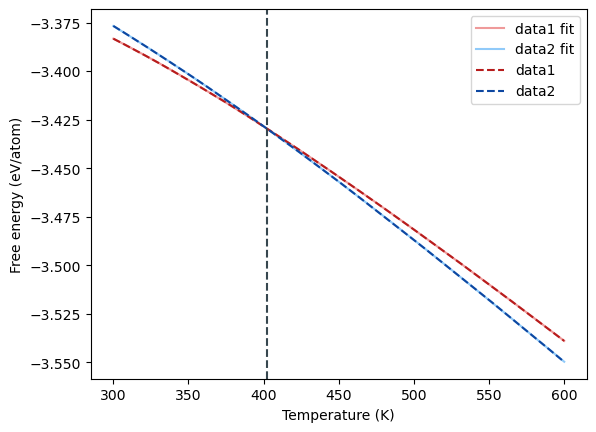

(402.0, None)

In [108]:
from pyiron_nodes.atomistic.property import calphy as pn_calphy
# Without this, when I try to reference pyiron_nodes.atomistic.property.calphy.X`, I get
# AttributeError: module 'pyiron_nodes.atomistic.property' has no attribute 'calphy'
# This must just be something with the init files not registering modules nicely over in pyiron_nodes
# My notebook is highlighting `property` as a python keyword, so maybe there is some conflict that 
# confuses things?
# Still, we never need to actually use pn_calphy, just completing the import is enough


wf = pwf.Workflow('calphy2')

element = "Al"
cell_size = 3
solid_fraction = 0

wf.CubicBulkCell = pyiron_nodes.atomistic.structure.build.CubicBulkCell(element=element, cell_size=cell_size) 
wf.Potential = pyiron_nodes.atomistic.engine.lammps.Potential(structure=wf.CubicBulkCell) 

wf.Tolerance = pyiron_nodes.atomistic.property.calphy.Tolerance(solid_fraction=solid_fraction) 
wf.InputClass = pyiron_nodes.atomistic.property.calphy.InputClass() 
wf.InputClass_1 = pyiron_nodes.atomistic.property.calphy.InputClass(tolerance=wf.Tolerance) 
wf.SolidFreeEnergyWithTemperature = pyiron_nodes.atomistic.property.calphy.SolidFreeEnergyWithTemperature(structure=wf.CubicBulkCell, potential=wf.Potential, inp=wf.InputClass_1, store=False) 
wf.LiquidFreeEnergyWithTemperature = pyiron_nodes.atomistic.property.calphy.LiquidFreeEnergyWithTemperature(potential=wf.Potential, structure=wf.CubicBulkCell, inp=wf.InputClass, store=False) 
wf.CalculatePhaseTransformationTemperature = pyiron_nodes.atomistic.property.calphy.CalculatePhaseTransformationTemperature(t1=wf.SolidFreeEnergyWithTemperature.outputs.t, 
                                                                                                                            f1=wf.SolidFreeEnergyWithTemperature.outputs.f, 
                                                                                                                            t2=wf.LiquidFreeEnergyWithTemperature.outputs.t, 
                                                                                                                            f2=wf.LiquidFreeEnergyWithTemperature.outputs.f) 

wf.CalculatePhaseTransformationTemperature.pull()

# ValueError: Was not able to locate the potential files in ResolverChain(ResourceResolver([], 'lammps''potentials'), ResourceResolver(['/Users/liamhuber/dev/miniforge3/envs/pycor12'], 'share''iprpy'))!
# Looks like we need to include some potentials in the repo

In [109]:
# # graph = full_graph = get_full_graph_from_wf(wf)
# graph = _load_graph("calphy2.json")
# Loading still doesn't work: https://github.com/JNmpi/pyiron_core/issues/52
# Let's use the commented-out running of the workflow we made here
graph = base.get_full_graph_from_wf(wf)


base.pull_node(base.get_updated_graph(graph), "LiquidFreeEnergyWithTemperature")

DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!


Adding macro node CubicBulkCell
Expanding node CubicBulkCell
Running node bulk
Running node InputClass
Running node repeat
Running node vacancy
Running node Potential
Running node LiquidFreeEnergyWithTemperature


/Users/liamhuber/dev/miniforge3/envs/pycor12/lib/python3.12/site-packages/ase/io/lammpsdata.py:49: FutureWarning: "style" is deprecated; please use "atom_style".
  warnings.warn(


(array([300.        , 300.060012  , 300.12004802, ..., 599.52038369,
        599.76009596, 600.        ]),
 array([-3.38113718, -3.38116675, -3.38119636, ..., -3.55688887,
        -3.5570474 , -3.55720618]))

critical feature:
- executorlib must be able to run single node or (sub)-workflow
- executorlib is a task manager (not a workflow executor)
- library stack:
    - workflow_creator
    - workflow_executor
    - executor_lib
- application:
    - exec.submit(node)  

In [110]:
@pwf.as_macro_node("transition_temperature")
def calphy2(element: str, cell_size: int = 1, solid_fraction: float = 0.7):

    from pyiron_workflow import Workflow
    import pyiron_nodes

    wf = Workflow('calphy2')

    wf.CubicBulkCell = pyiron_nodes.atomistic.structure.build.CubicBulkCell(element=element, cell_size=cell_size) 
    wf.Tolerance = pyiron_nodes.atomistic.property.calphy.Tolerance(solid_fraction=solid_fraction) 
    wf.InputClass = pyiron_nodes.atomistic.property.calphy.InputClass() 
    wf.Potential = pyiron_nodes.atomistic.engine.lammps.Potential(structure=wf.CubicBulkCell) 
    wf.InputClass_1 = pyiron_nodes.atomistic.property.calphy.InputClass(tolerance=wf.Tolerance) 
    wf.LiquidFreeEnergyWithTemperature = pyiron_nodes.atomistic.property.calphy.LiquidFreeEnergyWithTemperature(potential=wf.Potential, structure=wf.CubicBulkCell, inp=wf.InputClass) 
    wf.SolidFreeEnergyWithTemperature = pyiron_nodes.atomistic.property.calphy.SolidFreeEnergyWithTemperature(structure=wf.CubicBulkCell, potential=wf.Potential, inp=wf.InputClass_1) 
    wf.CalculatePhaseTransformationTemperature = pyiron_nodes.atomistic.property.calphy.CalculatePhaseTransformationTemperature(t1=wf.SolidFreeEnergyWithTemperature.outputs.t, f1=wf.SolidFreeEnergyWithTemperature.outputs.f, t2=wf.LiquidFreeEnergyWithTemperature.outputs.t, f2=wf.LiquidFreeEnergyWithTemperature.outputs.f) 

    return wf.CalculatePhaseTransformationTemperature# .outputs.transition_temp #, wf.CalculatePhaseTransformationTemperature.outputs.plot

    

It appears that macro of a macro does not work
- check!!

It does now! Calphy runs are costly, so we demo this separately now

Aside on macros within macros:

In [111]:
@pwf.as_function_node
def AddOne(x):
    y = x + 1
    return y
    
@pwf.as_macro_node(["y"])
def AddTwo(x):
    wf = pwf.Workflow("add_two_subgraph")
    wf.n1 = AddOne(x)
    wf.n2 = AddOne(wf.n1)
    return wf.n2

@pwf.as_macro_node(["y"])
def AddThree(x):
    wf = pwf.Workflow("add_three_subgraph")
    wf.n1 = AddOne(x)
    wf.n2 = AddTwo(x)
    return wf.n2

wf = pwf.Workflow("nested_macro_demo")
wf.nested = AddThree(0)
wf.run()

2

Note that nesting graph groups is currently still problematic: https://github.com/JNmpi/pyiron_core/issues/50

End aside on macros within macros

In [112]:
@pwf.as_macro_node("transition_temperature")
def calphy2(element: str, cell_size: int = 1, solid_fraction: float = 0.7):

    from pyiron_workflow import Workflow
    import pyiron_nodes

    wf = Workflow('calphy2')

    # wf.CubicBulkCell = pyiron_nodes.atomistic.structure.build.Bulk("Al") # CubicBulkCell(element=element, cell_size=cell_size) 
    wf.CubicBulkCell = pyiron_nodes.atomistic.structure.build.CubicBulkCell(element=element, cell_size=cell_size)

    return wf.CubicBulkCell

In [113]:
graph = base.Graph()
graph += pyiron_nodes.atomistic.structure.build.CubicBulkCell(element="Al")
graph.nodes

Adding macro node CubicBulkCell


,id,import_path,label,parent_id,level,node,graph,node_type,widget_type,expanded
0,CubicBulkCell,pyiron_nodes.atomistic.structure.build.CubicBu...,CubicBulkCell,None,0,<pyiron_workflow.simple_workflow.Node object a...,"Graph(id='CubicBulkCell', label='CubicBulkCell...",graph,customNode,True
1,va_i_CubicBulkCell__element,pyiron_workflow.api.serial.identity,va_i_CubicBulkCell__element,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
2,va_i_CubicBulkCell__cell_size,pyiron_workflow.api.serial.identity,va_i_CubicBulkCell__cell_size,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
3,va_i_CubicBulkCell__vacancy_index,pyiron_workflow.api.serial.identity,va_i_CubicBulkCell__vacancy_index,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
4,bulk,pyiron_nodes.atomistic.structure.build.Bulk,bulk,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
5,repeat,pyiron_nodes.atomistic.structure.transform.Repeat,repeat,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
6,vacancy,pyiron_nodes.atomistic.structure.transform.Cre...,vacancy,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
7,va_o_CubicBulkCell__structure,pyiron_workflow.api.serial.identity,va_o_CubicBulkCell__structure,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False


In [114]:
n = calphy2(element="Al")
graph = base.get_graph_from_macro_node(n)
# base.run_macro_node(n)
# base.GuiGraph(base.get_graph_from_macro_node(n))
# base.get_graph_from_macro_node(n).nodes["CubicBulkCell"].node.run()
graph.nodes

Adding macro node CubicBulkCell
Rewiring edge to va_i_CubicBulkCell__element__x
Rewiring edge to va_i_CubicBulkCell__cell_size__x
Rewiring edge to va_o_CubicBulkCell__structure__x


,id,import_path,label,parent_id,level,node,graph,node_type,widget_type,expanded
0,CubicBulkCell,pyiron_nodes.atomistic.structure.build.CubicBu...,CubicBulkCell,None,0,<pyiron_workflow.simple_workflow.Node object a...,"Graph(id='CubicBulkCell', label='CubicBulkCell...",graph,customNode,True
1,va_i_CubicBulkCell__vacancy_index,pyiron_workflow.api.serial.identity,va_i_CubicBulkCell__vacancy_index,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
2,va_i_calphy2__element,pyiron_workflow.api.serial.identity,va_i_calphy2__element,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
3,va_i_calphy2__cell_size,pyiron_workflow.api.serial.identity,va_i_calphy2__cell_size,None,0,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
4,va_i_CubicBulkCell__element,pyiron_workflow.api.serial.identity,va_i_CubicBulkCell__element,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
5,va_i_CubicBulkCell__cell_size,pyiron_workflow.api.serial.identity,va_i_CubicBulkCell__cell_size,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
6,bulk,pyiron_nodes.atomistic.structure.build.Bulk,bulk,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
7,repeat,pyiron_nodes.atomistic.structure.transform.Repeat,repeat,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
8,vacancy,pyiron_nodes.atomistic.structure.transform.Cre...,vacancy,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False
9,va_o_CubicBulkCell__structure,pyiron_workflow.api.serial.identity,va_o_CubicBulkCell__structure,CubicBulkCell,1,<pyiron_workflow.simple_workflow.Node object a...,None,node,customNode,False


In [115]:
@pwf.as_macro_node("structure")
def CubicBulkCell(
    element: str, cell_size: int = 1, vacancy_index: Optional[int] = None
):
    from pyiron_nodes.atomistic.structure.build import Bulk
    from pyiron_nodes.atomistic.structure.transform import (
        CreateVacancy,
        Repeat,
    )
    from pyiron_workflow import Workflow

    wf = Workflow('macro')

    wf.bulk = Bulk(name=element, cubic=True)
    wf.repeat = Repeat(structure=wf.bulk, repeat_scalar=cell_size)

    wf.vacancy = CreateVacancy(structure=wf.repeat, index=vacancy_index)
    return wf.vacancy

In [116]:
CubicBulkCell("Al").run()

DEBUG:pyiron_log:Not supported parameter used!
DEBUG:pyiron_log:Not supported parameter used!


Al: [0. 0. 0.]
Al: [0.    2.025 2.025]
Al: [2.025 0.    2.025]
Al: [2.025 2.025 0.   ]
tags: 
    indices: [0 0 0 0]
pbc: [ True  True  True]
cell: 
Cell([4.05, 4.05, 4.05])

In [117]:
pyiron_nodes.atomistic.structure.build.CubicBulkCell(element="Al")

In [118]:
%%time
with executorlib.SingleNodeExecutor(max_workers=4, block_allocation=True) as exe:
    future_lst = [exe.submit(sum, [i, i]) for i in range(2, 5)]
    print([f.result() for f in future_lst])

[4, 6, 8]
CPU times: user 48.6 ms, sys: 39.3 ms, total: 87.9 ms
Wall time: 147 ms


In [119]:
PRIMES = [
    112272535095293,
    112582705942171,
    112272535095293,
    115280095190773,
    115797848077099,
    1099726899285419]

def is_prime(n):
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False

    sqrt_n = int(math.floor(math.sqrt(n)))
    for i in range(3, sqrt_n + 1, 2):
        if n % i == 0:
            return False
    return True




In [120]:
%%time
with executorlib.SingleNodeExecutor(max_workers=6, block_allocation=False) as exe:
    future_lst = [exe.submit(is_prime, n) for n in PRIMES]
    print([f.result() for f in future_lst])

[True, True, True, True, True, False]
CPU times: user 50.3 ms, sys: 56.5 ms, total: 107 ms
Wall time: 306 ms


In [121]:
%%time
with executorlib.SingleNodeExecutor(max_workers=1, block_allocation=True) as exe:
    future_lst = [exe.submit(pyiron_nodes.atomistic.structure.build.Bulk()._func, n) for n in ["Al", "Fe", "Ni", "Zn"]]
    print([f.result() for f in future_lst])

[Al: [0. 0. 0.]
tags: 
    indices: [0]
pbc: [ True  True  True]
cell: 
Cell([[0.0, 2.025, 2.025], [2.025, 0.0, 2.025], [2.025, 2.025, 0.0]])
, Fe: [0. 0. 0.]
tags: 
    indices: [0]
    spin: [2.3]
    initial_magmoms: [2.3]
pbc: [ True  True  True]
cell: 
Cell([[-1.435, 1.435, 1.435], [1.435, -1.435, 1.435], [1.435, 1.435, -1.435]])
, Ni: [0. 0. 0.]
tags: 
    indices: [0]
    spin: [0.6]
    initial_magmoms: [0.6]
pbc: [ True  True  True]
cell: 
Cell([[0.0, 1.76, 1.76], [1.76, 0.0, 1.76], [1.76, 1.76, 0.0]])
, Zn: [0. 0. 0.]
Zn: [4.92198874e-17 1.53575172e+00 2.46848000e+00]
tags: 
    indices: [0 0]
pbc: [ True  True  True]
cell: 
Cell([[2.66, 0.0, 0.0], [-1.33, 2.303627574066607, 0.0], [0.0, 0.0, 4.936960000000001]])
]
CPU times: user 45.7 ms, sys: 28.7 ms, total: 74.4 ms
Wall time: 1.13 s


In [122]:
Al = pyiron_nodes.atomistic.structure.build.Bulk()._func('Al')
Al.species[0].name

'Aluminum'

In [123]:
%%time
for n in ["Al", "Fe"]:
    print(pyiron_nodes.atomistic.structure.build.Bulk(n).run())

Al
Fe
CPU times: user 5.26 ms, sys: 4.48 ms, total: 9.75 ms
Wall time: 6.47 ms


In [124]:
elements = ['Al', 'Fe']


# We can use a with statement to ensure threads are cleaned up promptly
with concurrent.futures.ThreadPoolExecutor(max_workers=1) as executor:
    # Start the load operations and mark each future with its URL
    futures = {executor.submit(pyiron_nodes.atomistic.structure.build.Bulk()._func, el, **{'cubic': True}): el for el in elements}
    for future in concurrent.futures.as_completed(futures):
        out = futures[future]
        print("out: ", out)

        data = future.result()
        print(data.__repr__())

out:  Al
Al: [0. 0. 0.]
Al: [0.    2.025 2.025]
Al: [2.025 0.    2.025]
Al: [2.025 2.025 0.   ]
tags: 
    indices: [0 0 0 0]
pbc: [ True  True  True]
cell: 
Cell([4.05, 4.05, 4.05])

out:  Fe
Fe: [0. 0. 0.]
Fe: [1.435 1.435 1.435]
tags: 
    indices: [0 0]
    spin: [2.3 2.3]
    initial_magmoms: [2.3 2.3]
pbc: [ True  True  True]
cell: 
Cell([2.87, 2.87, 2.87])



In [125]:
@pwf.as_function_node
def IterNode(node: pwf.Node, kwarg_name: str, kwarg_list: list, max_workers: int=1, executor=None):
    # from concurrent.futures import ThreadPoolExecutor as Executor
    from executorlib import SingleNodeExecutor as Executor
    from concurrent.futures import as_completed

    out_dict = dict()
    with Executor(max_workers=max_workers) as executor:
        # Start the load operations and mark each future with its index
        futures = {executor.submit(node._func, **{kwarg_name: el}): el for el in kwarg_list}
        for future in as_completed(futures):
            out = futures[future]    
            data = future.result()
            out_dict[out] = data.species[0].name
            
            # print("out: ", out)
            # print(data.__repr__())
            
    return out_dict
    

In [126]:
%%time
elements = ['Al', 'Fe']

IterNode(pyiron_nodes.atomistic.structure.build.Bulk(), "name", elements, max_workers=2).run()

copy node:  Bulk 71d3045ad08e22c2646746e6074957270f043ff8bff8fb5a12fd3ac1dad2cab0
CPU times: user 168 ms, sys: 28.5 ms, total: 197 ms
Wall time: 917 ms


{'Fe': 'Iron', 'Al': 'Aluminum'}

In [127]:
# Define the matrix mat and the index array ind1
mat = np.array([[0, 1, 2],
                [3, 4, 5],
                [6, 7, 8]])

ind1 = np.array([1, 0, 2])

# Compute v using advanced indexing
v = mat[ind1, np.arange(len(ind1))]

v  # Output: [3, 1, 8]

array([3, 1, 8])

In [128]:
n = pyiron_nodes.atomistic.structure.build.Bulk("Al")

In [129]:
kwargs = n.kwargs
kwargs.update({"a": 2.1})
kwargs

{'name': 'Al',
 'crystalstructure': None,
 'a': 2.1,
 'c': None,
 'c_over_a': None,
 'u': None,
 'orthorhombic': False,
 'cubic': False}

In [130]:
# CLEANUP

lpg.stop()
lpg.remove()

cwd = pathlib.Path(".")
for name in json_files:
    with contextlib.suppress(FileNotFoundError):
        (cwd / name).unlink()

with contextlib.suppress(FileNotFoundError):
    (cwd / "NiAlH_jea.eam.alloy").unlink()

with contextlib.suppress(FileNotFoundError):
    (cwd / "pyiron.log").unlink()

for path in cwd.glob("*.dat"):
    with contextlib.suppress(FileNotFoundError):
        path.unlink()

for path in cwd.glob("*.dat-*"):
    if path.is_dir():
        with contextlib.suppress(FileNotFoundError):
            shutil.rmtree(path)

path = (cwd / ".storage")
if path.is_dir():
    with contextlib.suppress(FileNotFoundError):
        shutil.rmtree(path)

Running ('pg_ctl', '-D', '/Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata', 'stop')
waiting for server to shut down.... done
server stopped
Running ('pg_ctl', '-D', '/Users/liamhuber/dev/pycor/pyiron_core/.pycor/pgdata', 'status')
